## Naver Blog 크롤링후 워드크라우드 작성
 - 22번줄 Google chrome 드라이브 경로 설정
   - chrome 드라이브 경로 설정은 네이버 검색.
 - 69, 70번중 불용어모음.txt 경로 설정
   - 불용어모음.txt - 어디 있을지 찾아 보셔요..

In [1]:
# 한글 자연어 처리 라이브러리
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\504\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [16]:
# pip install konlpy
# pip install matplotlib
# pip install wordcloud

검색어를 입력해주세요 :야식추천
시작페이지 설정_ex) 1 :1
마지막페이지 설정_ex) 2 :5
한페이지당 출력 최소 갯수_ex) 최소 1 :1
한페이지당 출력 최대 갯수_ex) 최대 7 :7
출력빈도 TOP 설정 : 4
수집중....
수집이 완료 되었습니다....
그래프 구축 중입니다....
Bar 그래프 구축이 완료되었습니다.


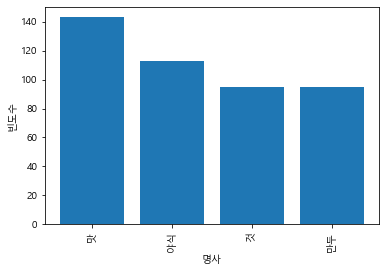

WordCloud 구축중입니다....
WordCloud 구축이 완료되었습니다.


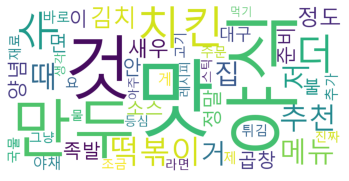

In [6]:
from selenium import webdriver
from nltk import Text
from konlpy.tag import *        #pip install konlpy 먼저 하세요
import matplotlib.pyplot as plt #pip install matplotlib 먼저 하세요
from matplotlib import font_manager , rc
from wordcloud import WordCloud  # pip install wordcloud 먼저 하세요
from collections import Counter
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import time
import warnings
warnings.filterwarnings('ignore')

text = input("검색어를 입력해주세요 :") # 검색어
text1 = int(input("시작페이지 설정_ex) 1 :"))
text2 = int(input("마지막페이지 설정_ex) 2 :"))
text3=int(input("한페이지당 출력 최소 갯수_ex) 최소 1 :"))
text4=int(input("한페이지당 출력 최대 갯수_ex) 최대 7 :"))
text5 = int(input("출력빈도 TOP 설정 : "))

path = "D:/00_Limhs/py_data/drv/chromedriver.exe" # 웹드라이버 실행
 
RESULT_PATH ='~/Desktop/' 

driver = webdriver.Chrome(path) # 드라이버 경로 설정
url_list = [] # 블로그 url을 저장하기 위한 변수
content_list = "" # 블로그 content를 누적하기 위한 변수

print("="*40)        
print("수집중....")
print("="*40)
for i in range((text1),(text2)):  # 페이지까지의 블로그 내용을 읽어옴
    url = 'https://section.blog.naver.com/Search/Post.nhn?pageNo='+ str(i) + '&rangeType=ALL&orderBy=sim&keyword=' + text # url 값 설정
    driver.get(url)
    time.sleep(0.5) # 오류 방지 sleep
    for j in range((text3),(text4)): # 한페이지에서 가져올 데이터
        titles = driver.find_element_by_xpath('/html/body/ui-view/div/main/div/div/section/div[2]/div['+str(j)+']/div/div[1]/div[1]/a[1]')
        title = titles.get_attribute('href')
        url_list.append(title)

for url in url_list: # 저장했던 블로그 하나씩 순회
    driver.get(url)
    driver.switch_to.frame('mainFrame')
    overlays = ".se-component.se-text.se-l-default" # 내용 크롤링
    contents = driver.find_elements_by_css_selector(overlays)
     for content in contents:
        content_list = content_list + content.text # 각 블로그의 내용을 변수에 누적함
        
print("="*40)
print("수집이 완료 되었습니다....")
print("="*40)
time.sleep(3)

# 자연어 처리
okt = Okt()
kkma = Kkma( )

import nltk
from nltk.probability import FreqDist

myList = okt.pos(content_list, norm=True, stem=True) # 모든 형태소 추출

# content_list 에서 형태소추출함
myList_filter = [x for x, y in myList if y in ['Noun']] # 추출된 값 중 명사만 추출
Okt = Text(myList_filter, name="Okt")
word = myList_filter

stop1 = open('D:/00_Limhs/py_data/project/night_meals/불용어모음.txt',encoding='utf-8').read()
stop_list = stop1.split(open('D:/00_Limhs/py_data/project/night_meals/불용어모음.txt',encoding='utf-8').read())
tok =nltk.word_tokenize(str(word))

def stopword(word_tokenize):
    result = []
    for w in word_tokenize:
        if w not in stop_list:
            result.append(w)
    return result

print("="*40)
print("그래프 구축 중입니다....")
print("="*40)
time.sleep(1)

#okt.pos(data1)

# 그래프에서 한글이 출력이 안되는 문제 해결 (ㅁㅁㅁ 처럼 출력됨)
# 한글 글꼴 불러옴
font_location = "c:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=font_location).get_name()
rc('font', family=font_name)
 
# 그래프에서 x, y 값을 설정
wordInfo = dict()

for tags, counts in Okt.vocab().most_common(text5): # 출력 갯수 제한
    if(len(str(tags)) > 0):
        wordInfo[tags] = counts # wordinfo 카운터 세기
    values = sorted(wordInfo.values(), reverse=True)
    keys = sorted(wordInfo, key=wordInfo.get, reverse=True)

# 그래프 값 설정 및 bar 그래프 출력
print("Bar 그래프 구축이 완료되었습니다.")
time.sleep(1)

plt.bar(range(len(wordInfo)), values, align='center')
# 그래프 x, y 라벨 설정
plt.xlabel("명사")
plt.ylabel("빈도수")
plt.xticks(range(len(wordInfo)), list(keys), rotation='90')
plt.show()

print("="*40)
print("WordCloud 구축중입니다....")
print("="*40)
time.sleep(1)
print("WordCloud 구축이 완료되었습니다.")

# WordCloud 출력
wc = WordCloud(width = 1000, height = 500, background_color="white", font_path=font_location, max_words=50)
plt.imshow(wc.generate_from_frequencies(Okt.vocab()))
plt.axis(False) # 네모칸을 삭제 하려면 False
plt.show()